In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
wbc = load_breast_cancer()
X, y = wbc.data, wbc.target

In [3]:
wbc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

np.random.seed(12345)

In [5]:
X_df, y_df = load_breast_cancer(return_X_y=True, as_frame=True)

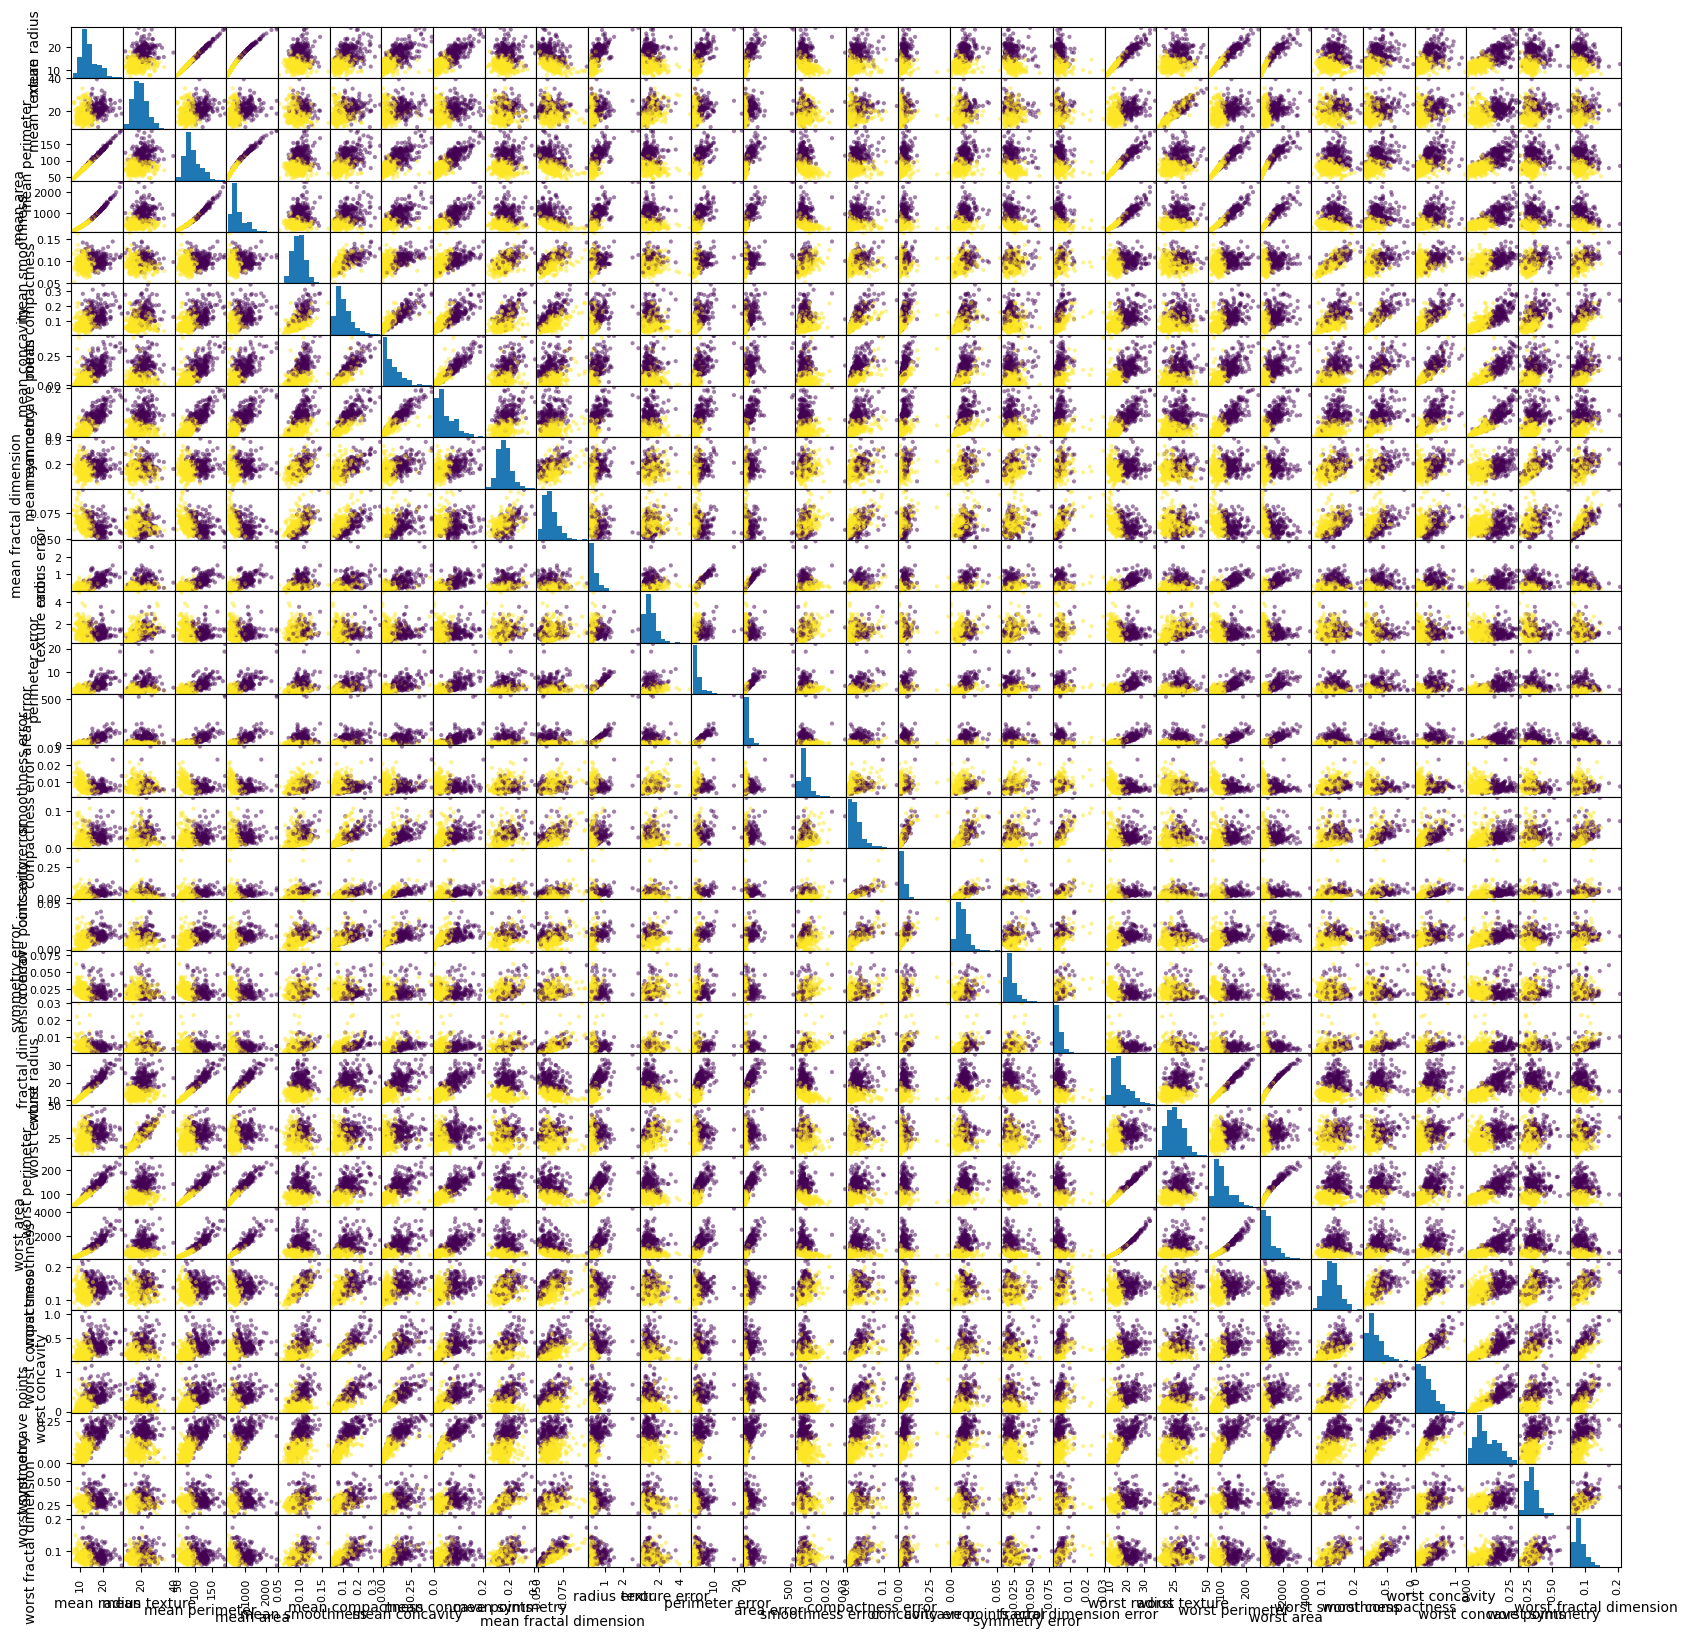

In [6]:
pd.plotting.scatter_matrix(X_df, c=y_df, figsize=(20, 20))
plt.show()

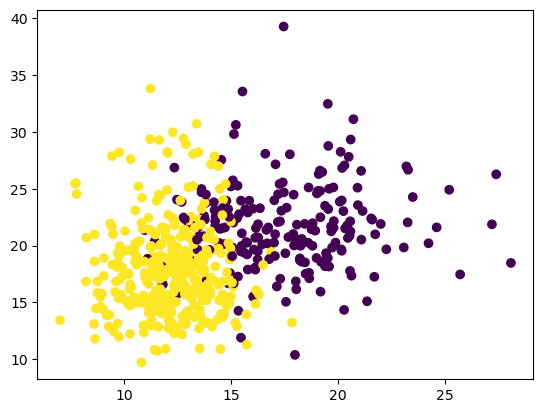

In [7]:
FEAT_1 = 0
FEAT_2 = 1

plt.scatter(X[..., FEAT_1], X[...,FEAT_2], c=y)
plt.show()

In [8]:
print(f"{wbc.feature_names[FEAT_1]}, {wbc.feature_names[FEAT_2]}")

mean radius, mean texture


In [9]:
from sklearn.linear_model import Perceptron

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_pp = X[..., [FEAT_1, FEAT_2]]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pp, y, stratify=y, random_state=12345)

In [13]:
pp = Perceptron()
pp.fit(X_train, y_train)

Perceptron()

In [14]:
pp.score(X_train, y_train)

0.7230046948356808

In [15]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

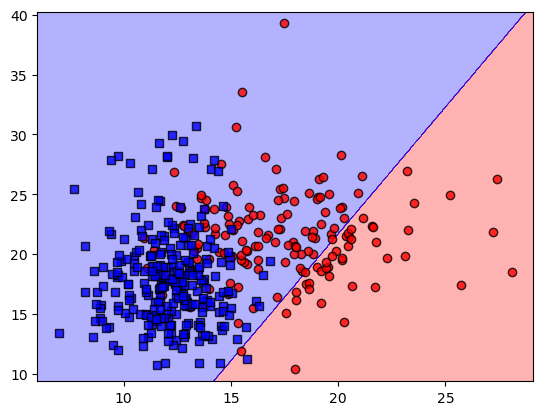

In [16]:
plot_decision_regions(X_train, y_train, classifier=pp)

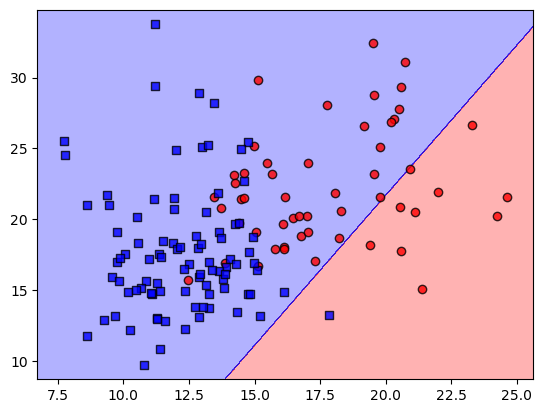

In [17]:
plot_decision_regions(X_test, y_test, classifier=pp)

In [18]:
from sklearn.neural_network import MLPClassifier as MLP

In [19]:
mlp= MLP(hidden_layer_sizes=100, activation='logistic')

In [20]:
mlp.fit(X_train, y_train)

/Users/leriomaggio/anaconda3/envs/machine-learning-book/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100)

In [21]:
mlp.score(X_train, y_train)

0.8591549295774648

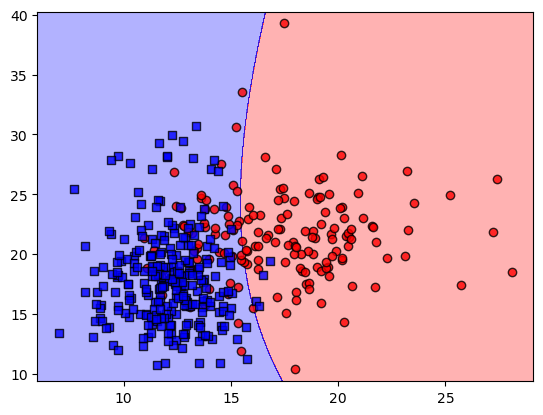

In [22]:
plot_decision_regions(X_train, y_train, classifier=mlp)

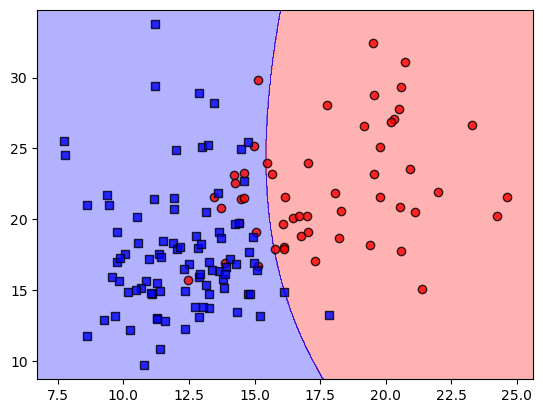

In [23]:
plot_decision_regions(X_test, y_test, classifier=mlp)

In [24]:
MLP?

Init signature:
MLP(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'ident